<h1><b>Определение перспективного тарифа для телеком-компании</b><h1>

<div style="border:solid green 2px; padding: 20px">
 
<b>Что у нас есть</b><br>
    В нашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год.<br><br>
<b>Что требуется сделать?</b><br>
    Необходмо проанализировать поведение клиентов и сделать вывод — какой тариф лучше.
    
</div>

<h1>Описание тарифов:</h1><br>
<br>
<b>Тариф «Смарт»</b>
<ul>
    <li>Ежемесячная плата: 550 рублей</li>
    <li>Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика</li>
    <li>Стоимость услуг сверх тарифного пакета:</li>
    <ul>
        <li>минута разговора: 3 рубля</li>
        <li>сообщение: 3 рубля</li>
        <li>1 Гб интернет-трафика: 200 рублей</li>
        </ul>
</ul> 
<br>
<b>Тариф «Ультра»</b>
<ul>
    <li>Ежемесячная плата: 1950 рублей</li>
    <li>Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика</li>
    <li>Стоимость услуг сверх тарифного пакета:</li>
    <ul>
        <li>минута разговора: 1 рубль</li>
        <li>сообщение: 1 рубль</li>
        <li>1 Гб интернет-трафика: 150 рублей</li>
        </ul>
</ul>  
    


<h1>Описание данных:</h1>
<br>
<b>users (информация о пользователях):</b>
<ul>
<li><i>user_id</i> — уникальный идентификатор пользователя</li>
<li><i>first_name</i> — имя пользователя</li>
<li><i>last_name</i> — фамилия пользователя</li>
<li><i>age</i> — возраст пользователя (годы)</li>
<li><i>reg_date</i> — дата подключения тарифа (день, месяц, год)</li>
<li><i>churn_date</i> — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)</li>
<li><i>city</i> — город проживания пользователя</li>
<li><i>tariff</i> — название тарифного плана</li>
</ul>
<br>
<b>calls (информация о звонках):</b>
<ul>
<li><i>id</i> — уникальный номер звонка</li>
<li><i>call_date</i> — дата звонка</li>
<li><i>duration</i> — длительность звонка в минутах</li>
<li><i>user_id</i> — идентификатор пользователя, сделавшего звонок</li>
</ul>
<br>
<b>messages (информация о сообщениях):</b>
<ul>
<li><i>id</i> — уникальный номер сообщения</li>
<li><i>message_date</i> - дата сообщения</li>
<li><i>user_id</i> — идентификатор пользователя, отправившего сообщение</li>
</ul>
<br>
<b>internet (информация об интернет-сессиях):</b>
<ul>
<li><i>id</i> — уникальный номер сесси</li>
<li><i>mb_used</i>объём потраченного за сессию интернет-трафика (в мегабайтах)</li>
<li><i>session_date</i> — дата интернет-сессии</li>
<li><i>user_id</i> — идентификатор пользователя</li>
</ul>
<br>
<b>tariffs (информация о тарифах):</b>
<ul>
<li><i>tariff_name</i> — название тарифа</li>
<li><i>rub_monthly_fee</i>ежемесячная абонентская плата в рублях</li>
<li><i>minutes_included</i> — количество минут разговора в месяц, включённых в абонентскую плату</li>
<li><i>messages_included</i> — количество сообщений в месяц, включённых в абонентскую плату</li>
<li><i>mb_per_month_included</i> -  объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)</li>
<li><i>rub_per_minute</i> - стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)</li>
<li><i>rub_per_message</i> - стоимость отправки сообщения сверх тарифного пакета</li>
    <li>rub_per_gb<i></i> - стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)</li>
</ul>



## Подготовка и изучение данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy import stats as st

<div class="alert alert-info">
<b>Таблица users</b>    
</div>

In [2]:
data_users = pd.read_csv('/datasets/users.csv')
data_users.head(15)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


In [3]:
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [4]:
data_users.isnull().sum()

user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

<div class="alert alert-info">
<b>В таблице users нет пропусков, требующих заполнения</b><br>
<b>churn_date</b> содержит пропуски в 462 строках, так как эти клиенты еще использовали тарифный план на момент выгрузки    
</div>

<div class="alert alert-info">
<b>Таблица calls</b>    
</div>

In [5]:
data_calls = pd.read_csv('/datasets/calls.csv')
data_calls.head(15)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


<b>Добавили столбец tariff в таблицу data_calls</b>

In [6]:
data_calls['tariff'] = data_users['tariff']

In [7]:
data_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
 4   tariff     500 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 7.7+ MB


Тип столбца <b>call_date</b> изменим на data

In [8]:
data_calls["call_date"]= pd.to_datetime(data_calls["call_date"],format='%Y-%m-%d',errors='coerce')

In [9]:
data_calls.isnull().sum()

id                0
call_date         0
duration          0
user_id           0
tariff       202107
dtype: int64

<div class="alert alert-info">
<b>В таблице calls нет пропусков, требующих заполнения</b><br>   
</div>

<div class="alert alert-info">
<b>Таблица messages</b><br>   
</div>

In [10]:
data_messages = pd.read_csv('/datasets/messages.csv')
data_messages.head(15)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


In [11]:
data_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


Тип столбца <b>message_date</b> изменим на data

In [12]:
data_messages["message_date"]= pd.to_datetime(data_messages["message_date"],format='%Y-%m-%d',errors='coerce')

In [13]:
data_messages.isnull().sum()

id              0
message_date    0
user_id         0
dtype: int64

<div class="alert alert-info">
<b>В таблице messages нет пропусков, требующих заполнения</b><br>   
</div>

<div class="alert alert-info">
<b>Таблица internet</b><br>   
</div>

In [14]:
data_internet = pd.read_csv('/datasets/internet.csv')
data_internet.head(15)

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


In [15]:
data_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


Удалим столбец <b>Unnamed: 0</b> он никакой информации для нас не несёт. Он не описан в описании данных этой таблицы, можно предположить что добавлен в таблицу ошибочно

In [16]:
data_internet.drop(columns = ['Unnamed: 0'],axis = 1,  inplace=True)

Тип столбца <b>session_date</b> изменим на data

In [17]:
data_internet["session_date"]= pd.to_datetime(data_internet["session_date"],format='%Y-%m-%d',errors='coerce')

In [18]:
data_messages.isnull().sum()

id              0
message_date    0
user_id         0
dtype: int64

<div class="alert alert-info">
<b>В таблице internet нет пропусков, требующих заполнения</b><br>   
</div>

<div class="alert alert-info">
<b>Таблица tariffs</b><br>   
</div>

In [19]:
data_tariffs = pd.read_csv('/datasets/tariffs.csv')
data_tariffs.head(15)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [20]:
data_tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [21]:
data_tariffs.isnull().sum()

messages_included        0
mb_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
tariff_name              0
dtype: int64

In [22]:
data_tariffs.rename(columns = {'tariff_name' : 'tariff'}, inplace = True) 

<div class="alert alert-info">
<b>В таблице tariffs нет пропусков, требующих заполнения</b><br>   
</div>

<b>округлим длительность звонка</b>

In [23]:
data_calls['duration'] = data_calls['duration'].apply(np.ceil)

<b>сделам столбец с длитетельностью звонка целочисленным</b>

In [24]:
data_calls['duration'] = data_calls['duration'].astype('int')

<b>Посчитаем для каждого пользователя:</b><br>
<ul>
    <li>количество сделанных звонков и израсходованных минут разговора по месяцам</li>
    <li>количество отправленных сообщений по месяцам</li>
    <li>объем израсходованного интернет-трафика по месяцам</li>
    <li>помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану)</li>
</ul>

<b>количество сделанных звонков и количество израсходованных минут разговора по месяцам</b>

In [26]:
data_calls['month'] = pd.DatetimeIndex(data_calls['call_date']).month

In [27]:
user_calls = data_calls.groupby(
    ['user_id', 'month']).agg({'id': ['count'], 'duration' : ['sum']})

In [28]:
user_calls.columns = ['call_total', 'minutes_total']

In [29]:
user_calls.head(20)

call_total  minutes_total
user_id month                           
1000    5              22            159
        6              43            172
        7              47            340
        8              52            408
        9              58            466
        10             57            350
        11             43            338
        12             46            333
1001    11             59            430
        12             63            414
1002    6              15            117
        7              26            214
        8              42            289
        9              36            206
        10             33            212
        11             32            243
        12             33            236
1003    8              55            380
        9             134            961
        10            108            855

<b>количество отправленных сообщений по месяцам</b>

In [31]:
data_messages['month'] = pd.DatetimeIndex(data_messages ['message_date']).month

In [32]:
user_messages = data_messages.groupby (['user_id', 'month']).count()

In [33]:
user_messages = user_messages.drop('message_date', axis=1) 

In [34]:
user_messages.columns = ['messages_total']

In [35]:
user_messages.head(15)

messages_total
user_id month                
1000    5                  22
        6                  60
        7                  75
        8                  81
        9                  57
        10                 73
        11                 58
        12                 70
1002    6                   4
        7                  11
        8                  13
        9                   4
        10                 10
        11                 16
        12                 12

<b>объем израсходованного интернет-трафика по месяцам</b>

In [36]:
user_internet = data_internet.pivot_table(index=['user_id',pd.DatetimeIndex(data_internet['session_date']).month] , values='mb_used', aggfunc='sum')

In [38]:
data_internet['month'] = pd.DatetimeIndex(data_internet['session_date']).month

In [39]:
user_internet = data_internet.groupby(['user_id', 'month']).agg(['count', 'sum'])

In [40]:
user_internet = user_internet.drop(('id', 'count'), axis=1)

In [41]:
user_internet = user_internet.drop(('id', 'sum'), axis=1)

In [42]:
user_internet = user_internet.drop(('mb_used', 'count'), axis=1)

In [43]:
user_internet.columns = ['megabytes_used']

In [44]:
user_internet

megabytes_used
user_id month                
1000    5             2253.49
        6            23233.77
        7            14003.64
        8            14055.93
        9            14568.91
...                       ...
1498    10           20579.36
1499    9             1845.75
        10           17788.51
        11           17963.31
        12           13055.58

[3203 rows x 1 columns]

In [45]:
data_users['first_month'] = pd.DatetimeIndex(data_users['reg_date']).month 
data_users['last_month'] = pd.DatetimeIndex(data_users['churn_date']).month 

Добавление столбца, в котором <b>пересчитаем мегабайты в гигaбайты</b>

In [46]:
user_internet['gb_used'] = user_internet['megabytes_used']/1024

In [47]:
user_internet['gb_used'] = np.ceil(user_internet['gb_used'])

In [48]:
user_internet['gb_used'] = pd.to_datetime(user_internet['gb_used']).astype(int)

<b>Cоединение таблиц</b>

In [49]:
data_full = user_calls.merge(user_messages, on= ['user_id', 'month'],  how ='outer')
data_full = data_full.merge(user_internet, on= ['user_id', 'month'],  how ='outer')
data_full = data_full.merge (data_users, on = 'user_id', how = 'left')
data_full=data_full.reset_index()

В столбцах minutes_total, messages_total, gb_used есть пропуски<br>
Это может быть связано с тем, что в некоторых месяцах, некоторые пользователи не пользовались одной из этих услуг<br><b>заменим пропуски в столбцах нулями</b>

In [50]:
data_full['gb_used'] = data_full['gb_used'].fillna(0)
data_full['messages_total'] = data_full['messages_total'].fillna(0)
data_full['minutes_total'] = data_full['minutes_total'].fillna(0)

<b>Функция для расчета выручки</b>

In [51]:
def accumulate (raw):
    tariff = raw['tariff']
    calls = raw['minutes_total']
    message =raw['messages_total'] 
    gbyte = raw['gb_used']
    if tariff =='ultra':
        if calls >= 3000: 
            calls = (calls - 3000)*1
        else:
            calls = 0
        if message >= 1000:
            message = (message-1000)*1
        else:
            message =0       
        if gbyte >=30:
                gbyte =(gbyte -30)*150
        else:
            gbyte =0
        return 1950 + calls + message + gbyte
    if tariff == 'smart':
        if calls >=500: 
            calls = (calls - 500)*3
        else:
            calls = 0
        if message >= 50:
            message = (message-50)*3
        else:
            message = 0       
        if gbyte >= 15:
                gbyte = (gbyte -15)*200
        else:
            gbyte = 0
        return 550 + calls + message + gbyte


In [52]:
data_full['revenue'] = data_full.apply(accumulate, axis =1)

In [53]:
pd.options.display.max_columns = None
data_full = data_full.merge (data_tariffs, on = 'tariff', how = 'left')
data_full.head(2)

,index,user_id,call_total,minutes_total,messages_total,megabytes_used,gb_used,age,churn_date,city,first_name,last_name,reg_date,tariff,first_month,last_month,revenue,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,0,1000,22.0,159.0,22.0,2253.49,3.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,NaN,1950.0,1000,30720,3000,1950,150,1,1
1,1,1000,43.0,172.0,60.0,23233.77,23.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,NaN,1950.0,1000,30720,3000,1950,150,1,1


## Анализ данных

Для сравнения потребления услуг пользователями различных тарифов строим гистограммы распределения на одном графике по обоим тарифам.

<b>Продолжительность звонков</b>

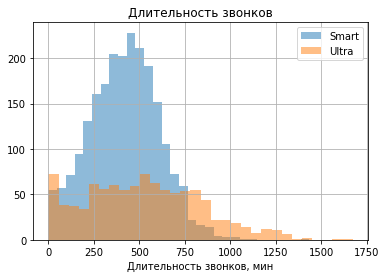

Среднее Smart: 418.0
Среднее Ultra: 527.0
Дисперсия Smart: 36203.06665209469
Дисперсия Ultra: 100771.2236172022
Стандартное отклонение Smart 190.27103471651876
Стандартное отклонение Ultra 317.44483554974113


In [55]:
data_full.query('tariff == "smart"')['minutes_total'].hist(bins = 30, alpha = .5)
data_full.query('tariff == "ultra"')['minutes_total'].hist(bins = 30, alpha = .5)

plt.title('Длительность звонков')
plt.legend(['Smart', 'Ultra'])
plt.xlabel('Длительность звонков, мин')
plt.show()

print('Среднее Smart:', np.round(data_full.query('tariff == "smart"')['minutes_total'].mean()))
print('Среднее Ultra:', np.round(data_full.query('tariff == "ultra"')['minutes_total'].mean()))
print('Дисперсия Smart:', np.var(data_full.query('tariff == "smart"')['minutes_total']))
print('Дисперсия Ultra:', np.var(data_full.query('tariff == "ultra"')['minutes_total']))
print('Стандартное отклонение Smart', np.std(data_full.query('tariff == "smart"')['minutes_total']))
print('Стандартное отклонение Ultra', np.std(data_full.query('tariff == "ultra"')['minutes_total']))

boxplot


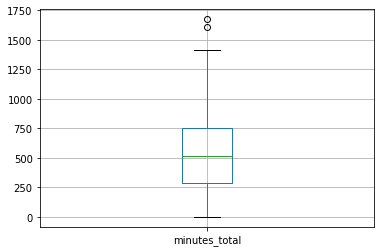

In [56]:
data_full.query('tariff == "ultra"').boxplot(['minutes_total'])
print('boxplot')

<b>Анализ диаграммы размаха для тарифа ultra:</b><br>
Медиана приблизительно равна 550<br>
Нижний «ус» упирается в 0 - это минимальное значение<br>
Верхний заканчивается около <b>1400</b> минут — это 1,5 межквартильного размаха, добавленного к 3-му квартилю.<br>
Это ориентировочная граница нормального размаха.<br>
Всё, что лежит за ней, считается выбросом.<br>

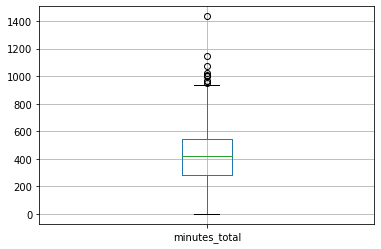

In [57]:
data_full.query('tariff == "smart"').boxplot(['minutes_total']);

<b>Анализ диаграммы размаха для тарифа smart:</b><br>
Медиана приблизительно равна 420<br>
Нижний «ус» упирается в 0 - это минимальное значение<br>
Верхний заканчивается около <b>900</b> минут — это 1,5 межквартильного размаха, добавленного к 3-му квартилю.<br>
Это ориентировочная граница нормального размаха.<br>
Всё, что лежит за ней, считается выбросом.<br>

<b>Вывод по продолжительности звонков:</b><br>
<ul>
    <li>Среднее значение выше на тарифе Ultra. Однако и стандартное отклонение выше на этом тарифе, что говорит о сильном разбросе данных</li>
    <li>Пользователи тарифа Smart используют от чаще всего 280-580 минут</li>
    <li>Пользователи тарифа Ultra используют от чаще всего 260-750 минут</li>
</ul>

<b>Количество сообщений</b>

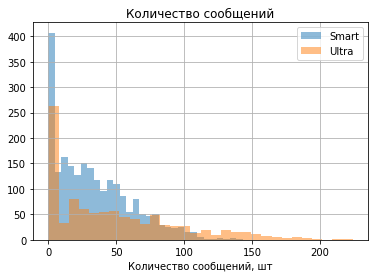

Среднее Smart: 33.0
Среднее Ultra: 49.0
Дисперсия Smart: 796.455482917076
Дисперсия Ultra: 2282.946075394882
Стандартное отклонение Smart 28.221542886898938
Стандартное отклонение Ultra 47.78018496610161


In [58]:
data_full.query('tariff == "smart"')['messages_total'].hist(bins = 30, alpha = .5)
data_full.query('tariff == "ultra"')['messages_total'].hist(bins = 30, alpha = .5)

plt.title('Количество сообщений')
plt.legend(['Smart', 'Ultra'])
plt.xlabel('Количество сообщений, шт')
plt.show()

print('Среднее Smart:', np.round(data_full.query('tariff == "smart"')['messages_total'].mean()))
print('Среднее Ultra:', np.round(data_full.query('tariff == "ultra"')['messages_total'].mean()))
print('Дисперсия Smart:', np.var(data_full.query('tariff == "smart"')['messages_total']))
print('Дисперсия Ultra:', np.var(data_full.query('tariff == "ultra"')['messages_total']))
print('Стандартное отклонение Smart', np.std(data_full.query('tariff == "smart"')['messages_total']))
print('Стандартное отклонение Ultra', np.std(data_full.query('tariff == "ultra"')['messages_total']))

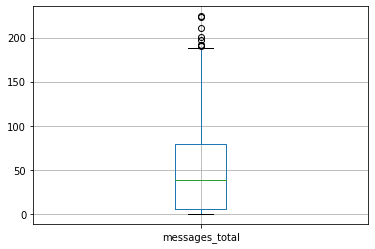

In [59]:
data_full.query('tariff == "ultra"').boxplot('messages_total');

<b>Анализ диаграммы размаха для тарифа ultra:</b><br>
Медиана приблизительно равна 35<br>
Нижний «ус» упирается в 0 - это минимальное значение.<br>
Верхний заканчивается около <b>170</b> штук — это 1,5 межквартильного размаха, добавленного к 3-му квартилю.<br>
Это ориентировочная граница нормального размаха.<br>
Всё, что лежит за ней, считается выбросом.<br>
Более высокие значения изображены отдельными точками, они не сливаются в единую жирную линию: таких выбросов не очень много.

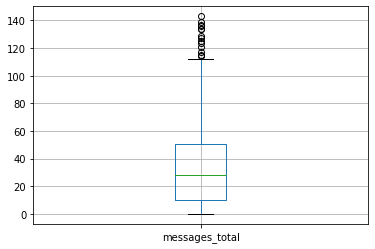

In [60]:
data_full.query('tariff == "smart"').boxplot('messages_total');

<b>Анализ диаграммы размаха для тарифа smart:</b><br>
Медиана приблизительно равна 30<br>
Нижний «ус» упирается в 0 - это минимальное значение.<br>
Верхний заканчивается около <b>115</b> штук — это 1,5 межквартильного размаха, добавленного к 3-му квартилю.<br>
Это ориентировочная граница нормального размаха.<br>
Всё, что лежит за ней, считается выбросом.<br>
Более высокие значения изображены отдельными точками, они не сливаются в единую жирную линию: таких выбросов не очень много.

<b>Вывод по количеству сообщений:</b><br>
<ul>
    <li>Как и на предыдущей диаграмме видим, что среднее значение выше на тарифе Ultra. Однако и стандартное отклонение выше на этом тарифе, что говорит о сильном разбросе данных</li>
    <li>Пользователи тарифа Ultra чаще отправляют 5-75 сообщений</li>
    <li>Пользователи тарифа Smart чаще отправляют 15-50 сообщений</li>
</ul>

<b>Интернет - трафик</b>

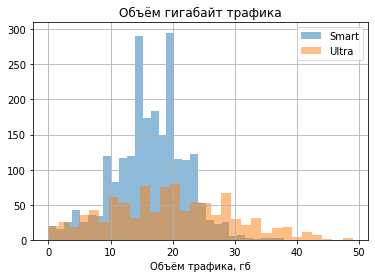

Среднее Smart: 16.0
Среднее Ultra: 19.0
Дисперсия Smart: 33.013887454837445
Дисперсия Ultra: 96.99311602978692
Стандартное отклонение Smart 5.745771267187499
Стандартное отклонение Ultra 9.848508314957495


In [61]:
data_full.query('tariff == "smart"')['gb_used'].hist(bins = 30, alpha = .5)
data_full.query('tariff == "ultra"')['gb_used'].hist(bins = 30, alpha = .5)

plt.title('Объём гигабайт трафика')
plt.legend(['Smart', 'Ultra'])
plt.xlabel('Объём трафика, гб')
plt.show()

print('Среднее Smart:', np.round(data_full.query('tariff == "smart"')['gb_used'].mean()))
print('Среднее Ultra:', np.round(data_full.query('tariff == "ultra"')['gb_used'].mean()))
print('Дисперсия Smart:', np.var(data_full.query('tariff == "smart"')['gb_used']))
print('Дисперсия Ultra:', np.var(data_full.query('tariff == "ultra"')['gb_used']))
print('Стандартное отклонение Smart', np.std(data_full.query('tariff == "smart"')['gb_used']))
print('Стандартное отклонение Ultra', np.std(data_full.query('tariff == "ultra"')['gb_used']))

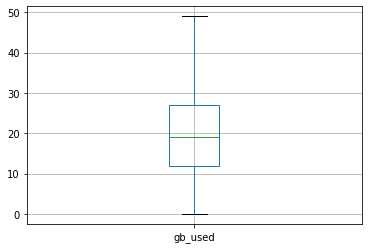

In [62]:
data_full.query('tariff == "ultra"').boxplot('gb_used');

<b>Анализ диаграммы размаха для тарифа ultra:</b><br>
Медиана приблизительно равна 29<br>
Нижний «ус» упирается в 0 - это минимальное значение.<br>
Верхний заканчивается около <b>49</b> Гб — это 1,5 межквартильного размаха, добавленного к 3-му квартилю.<br>
Это ориентировочная граница нормального размаха.<br>
Выбрасов на этом графике не наблюдается

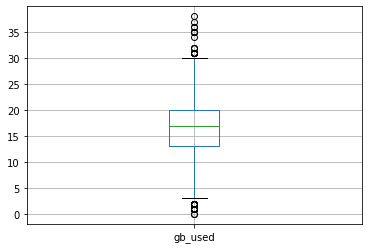

In [63]:
data_full.query('tariff == "smart"').boxplot('gb_used');

<b>Анализ диаграммы размаха для тарифа smart:</b><br>
Медиана приблизительно равна 17,5<br>
Нижний «ус» упирается в 4,5 - это минимальное значение<br>
Верхний заканчивается около <b>30</b>Гб — это 1,5 межквартильного размаха, добавленного к 3-му квартилю.<br>
Это ориентировочная граница нормального размаха.<br>
Всё, что лежит за ней, считается выбросом.<br>


<b>Вывод по объёмам трафика:</b><br>
<ul>
    <li>Пользователи тарифа Ultra чаще используют 11-28 Гб трафика</li>
    <li>Пользователи тарифа Smart чаще используют 13-20 Гб трафика</li>
</ul>

<b>Общий вывод:</b>
<ul>
    <li>Пользователи тарифа Smart используют от чаще всего 280-580 минут</li>
    <li>Пользователи тарифа Smart чаще используют 13-20 Гб трафика</li>
    <li>Пользователи тарифа Smart чаще отправляют 15-50 сообщений</li>
    <li>Пользователи тарифа Ultra используют от чаще всего 260-750 минут</li>
    <li>Пользователи тарифа Ultra чаще используют 11-28 Гб трафика</li>
    <li>Пользователи тарифа Ultra чаще отправляют 5-75 сообщений</li>
</ul>


## Проверка гипотез

<b>Проверка 1</b><br>
<b>Нулевая гипотеза:</b> средняя выручка пользователей тарифов «Ультра» и «Смарт» не различается<br>
<b>Альтернативная гипотеза:</b> средняя выручка между пользователями двух тарифов различается

Так как мы имеем 2 выборки разного размера (пользователей одного из тарифов - больше), вызовем метод scipy.stats.ttest_ind()

Критерием для сравнения служит выручка с каждого пользователя за весь 2018-й год, так как, в обоих тарифах имеются пользователи, которые пользовались тарифом меньше 12 месяцев. В обоих случаях, найдутся пользователи, которые в дальнейшем, останутся с данным тарифным планом или сменят его. 

In [64]:
user_month_mean = data_full.pivot_table(index='user_id', values=['first_month', 'last_month']).reset_index()

In [65]:
user_month_mean['last_month'] = user_month_mean['last_month'].fillna(12)
user_month_mean['last_month'] = user_month_mean['last_month'].astype(int)

In [66]:
user_month_mean['quantity_month'] = user_month_mean['last_month'] - user_month_mean['first_month']

In [67]:
user_month_mean = user_month_mean.merge(data_full[['user_id','tariff', 'revenue']], on='user_id')

In [68]:
user_month_mean['full_revenue'] = user_month_mean['quantity_month'] * user_month_mean['revenue']

In [69]:
alpha =  .05

results = st.ttest_ind(
    data_full.query('tariff == "smart"')['revenue'], 
    data_full.query('tariff == "ultra"')['revenue']) 

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу, о том что выручка между двумя тарифами не различается. Альтернативная гипотеза верна: средняя выручка между пользователями двух тарифов различается")

else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.4229814360764067e-160
Отвергаем нулевую гипотезу, о том что выручка между двумя тарифами не различается. Альтернативная гипотеза верна: средняя выручка между пользователями двух тарифов различается


<b>Проверка 2</b><br>
<b>Нулевая гипотеза:</b> средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов<br>
<b>Альтернативная гипотеза:</b> средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Так как мы имеем 2 выборки разного размера (пользователей одного из тарифов - больше), вызовем метод scipy.stats.ttest_ind()

Критерием для сравнения служит выручка с каждого пользователя за весь 2018-й год, так как, в обоих тарифах имеются пользователи, которые пользовались тарифом меньше 12 месяцев. В обоих случаях, найдутся пользователи, которые в дальнейшем, останутся с данным тарифным планом или сменят его.

In [70]:
def city_category (row):
    city = row ['city']
    if 'Москва' in city:
        return 'Пользователь из Москвы'
    else:
        return 'Пользователь из другого региона'
        
data_full['city_category'] = data_full.apply(city_category, axis=1)

In [71]:
data_full.groupby('city_category').agg({'revenue': ['mean']})

,revenue
,mean
city_category,
Пользователь из Москвы,1546.713584
Пользователь из другого региона,1524.936227


In [72]:
ultra_users = user_month_mean.query('tariff == "ultra"')
smart_users = user_month_mean.query('tariff == "smart"')

In [73]:
user_month_mean['city_category'] = data_full.apply(city_category, axis=1)

In [74]:
name_data_ultra = data_full.query('tariff == "ultra"')['revenue']
name_data_smart = data_full.query('tariff == "smart"')['revenue']

In [75]:
other_users = user_month_mean.query('city_category == "Пользователь из другого региона"')
msk_users = user_month_mean.query('city_category == "Пользователь из Москвы"')

In [76]:
alpha = .05 

results = st.ttest_ind(
    msk_users['full_revenue'], 
    other_users['full_revenue']) 

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу, о том что средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов. Альтернативная гипотеза верна: средняя выручка между пользователями средняя выручка пользователей из Москвы равна выручке пользователей из других регионов")
else:
    print("Не получилось отвергнуть нулевую гипотезу. Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.")

p-значение: 0.3426148242194397
Не получилось отвергнуть нулевую гипотезу. Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.


In [77]:
alpha =  .05

results = st.ttest_ind(
    ultra_users['full_revenue'], 
    smart_users['full_revenue']) 

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу, о том что выручка между двумя тарифами не различается. Альтернативная гипотеза верна: средняя выручка между пользователями двух тарифов различается")

else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.1198593729445706e-116
Отвергаем нулевую гипотезу, о том что выручка между двумя тарифами не различается. Альтернативная гипотеза верна: средняя выручка между пользователями двух тарифов различается


<b>Однако:</b>
С таким p-value можно сказать, что гипотезу о равенстве средних выручек пользователей из Москвы и пользователей из других регионов отвергнуть не удалось

## Общий вывод

Изучив данные выборки из 500 пользователей тарифов, получены следующие выводы:

Среднемесячная выручка с 1 пользователя тарифа Ultra почти в 2 раза превышает среднемесячну выручку с 1 пользователя тарифа Smart.
Общая выручка со всех пользователей тарифа Smart, за весь исследуемый период, превысила выручку со всех пользователей тарифа Ultra, почти на 4 миллиона рублей. Это объясняется тем, что в данной выборке, пользователей тарифа Smart более чем в 2 раза больше пользователей тарифа Ultra.

Пользователи тарифа Ultra используют незначительно больше минут, сообщений и интернет-трафика, чем пользователи тарифа Smart. Разница в потреблении минут - 14%, сообщений - 33%, интернет-трафика - 10%. А разница в абонентской плате более чем в 3 раза: 1950 рублей за тариф Ultra и 550 рублей за тариф Smart.

Исходя из этого, можно утверждать: тариф Ultra приносит больше денег сотовому оператору, чем тариф Smart. А раз у нас коммерческая компания, то для нее лучше тот, который приноcит больше прибыли, следовательно лучше Ultra
